In [64]:
import numpy as np
import pandas as pd
import csv
import os, sys
import matplotlib.pyplot as plt

In [75]:
benchmark_dir = "./benchmark"
csv_dir = "./results/enlarge2/"
nproc_list = [1, 2, 4, 8, 16, 32, 64, 128]
trial_num = 10
map_list = [
    "maze512-1-9.map",
    "maze512-4-6.map",
    "maze512-8-4.map",
    "maze512-32-9.map",
    # "Paris_1_256.map",
    # "Paris_1_512.map",
    # "Paris_1_1024.map",
    # "random512-40-5.map",
    # "orz900d.map",
    # "64room_005.map",
]


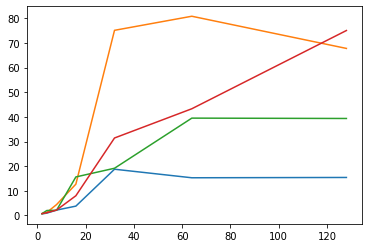

In [76]:
fig = plt.figure()

for map in map_list:
    csv_map_path = csv_dir + f"{map[:-4]}.csv"
    df = pd.read_csv(csv_map_path)
    df['speedup'] = None
    df_base = df[df['#node received']==0]
    df = df[df['#node received'] > 0]
    for idx, row in df.iterrows():
        instance = row['instance name']
        trial_idx = row['trial index']
        base_row = df_base[(df_base['instance name']==instance) & (df_base['trial index']==trial_idx)].iloc[0]
        df.at[idx, 'speedup'] = base_row['runtime'] / row['runtime']
    df['speedup'] = df['speedup'].astype(float)
    group_dict = {'speedup':['mean']}
    gdf = df.groupby(['instance name', 'nproc'], as_index=False).agg(group_dict)
    plt.plot(gdf['nproc'], gdf['speedup']['mean'])
